In [1]:
#Load libraries
import numpy as np               
import pandas as pd         
from sklearn import preprocessing 
import keras
import tensorflow as tf
from keras.layers import Dense    
from keras.layers import BatchNormalization 
from keras.layers import Dropout        
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers  
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner import Objective
from keras_tuner import HyperModel
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.utils import compute_class_weight
from keras import metrics
import sklearn
import matplotlib.pyplot as plot

In [19]:
#Import Data
nfl_data = pd.read_csv("c:/users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/NFL/Masters/FINALDATASETS/Final Data Sets/modelready/june7_verified.csv")
nfl_data.head()

,idx,week,season,playoff,team_home,team_away,score_home,score_away,team_favorite_id,home_favored,...,fav_dl_score,fav_coach_score,SCALEweather_temperature,LOGspread_favorite,LOGhome_ch_tenure,LOGaway_ch_tenure,SCALEdistance_traveled,NORMhome_stadium_capacity,NORMwaway_stadium_capacity,SCALEelevation_difference
0,1,1,2016,0,Denver Broncos,Carolina Panthers,21,20,Carolina Panthers,0,...,4.769231,4,1.436930,1.098612,0.693147,1.791759,0.624131,0.696429,0.584667,3.464960
1,2,1,2016,0,Arizona Cardinals,New England Patriots,21,23,Arizona Cardinals,1,...,-2.700000,-13,0.661558,2.140066,1.386294,2.833213,2.067255,0.090476,0.345524,0.874311
2,3,1,2016,0,Atlanta Falcons,Tampa Bay Buccaneers,24,31,Atlanta Falcons,1,...,-0.736364,1,0.661558,0.916291,0.693147,0.000000,-0.830214,0.452381,0.209048,0.783008
3,4,1,2016,0,Baltimore Ravens,Buffalo Bills,13,7,Baltimore Ravens,1,...,-2.522727,7,1.436930,1.098612,2.197225,0.693147,-1.059445,0.452762,0.593667,-0.326343
4,5,1,2016,0,Dallas Cowboys,New York Giants,19,20,New York Giants,0,...,-4.454545,-6,0.661558,0.000000,1.945910,0.000000,0.667405,0.880952,1.000000,0.401583


In [20]:
#Remove Variables
nfl_data.drop(["home_rookie_coach", "away_rookie_coach", "home_ovr_avg_att",
              "away_ovr_avg_att", "home_team_overall", "away_team_overall", "team_home",
              "team_away", "team_favorite_id", "score_home", "score_away", "SuperBowl", 
              "over", "dog_covered", "fav_covered", "winner_yards", "loser_yards", "winner_turnover", "loser_turnovers",
               "away_fav", "winner_turnover", "fav_won6", "idx", "dog", "winner", "loser", "margin_of_victory"],
              axis=1, inplace=True)

In [21]:
#View the Data
#Set display to see all columns with 4 decimal places
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 4)
nfl_data.head()

,week,season,playoff,home_favored,fav_tot_szn_yds,dog_tot_szn_yds,fav_avg_yds,dog_avg_yds,fav_tot_to,fav_avg_to,dog_tot_to,dog_avg_to,fav_tot_yds_agnst,fav_avg_yds_agnst,dog_tot_yds_agnst,dog_avg_yds_agnst,fav_tot_takeaways,fav_avg_takeways,dog_tot_takeaways,dog_avg_takeways,over_under_line,fav_won,fav_prev_fav,curr_fav_won_lst_wk_prev_fav,dog_prev_dog,curr_dog_won_lst_wk_prev_dog,fav_won_lst_wk,dog_won_lst_wk,fav_record,dog_record,fav_avg_point_scored_home,fav_avg_point_scored_away,fav_avg_point_scored,dog_avg_point_scored_home,dog_avg_point_scored_away,dog_avg_point_scored,fav_avg_pts_agnst_home,fav_avg_pts_agnst_away,fav_avg_pts_agnst,dog_avg_pts_agnst_home,dog_avg_pts_agnst_away,dog_avg_pts_agnst,fav_covered_pct,dog_covered_pct,fav_avg_margin_victory,dog_avg_margin_victory,fav_avg_margin_of_defeat,dog_avg_margin_of_defeat,fav_total_points_for,dog_total_points_for,fav_total_points_against,dog_total_points_against,stadium_neutral,home_avg_att,home_trvl_avg_att,away_avg_att,away_trvl_avg_att,home_def_overall,home_off_overall,away_def_overall,away_off_overall,home_QB,home_HB,home_WR,home_OL,home_TE,home_DL,home_LB,home_SCDY,home_SPT,away_QB,away_HB,away_WR,away_OL,away_TE,away_DL,away_LB,away_SCDY,away_SPT,wildcard,Divisionalround,Conferencechamp,home_cold,home_warm,home_moderate,home_outdoor,home_GrassField,away_cold,away_warm,away_moderate,away_outdoor,away_GrassField,DivisionalGame,ConfreneceGame,freezing,breezy,windy,rain,home_stdm_age,away_stdm_age,home_AFC,away_AFC,home_AFCeast,home_AFCsouth,home_AFCwest,home_NFCeast,home_NFCsouth,home_NFCwest,away_AFCeast,away_AFCsouth,away_AFCwest,away_NFCeast,away_NFCsouth,away_NFCwest,fav_ovrl_score,fav_off_score,fav_def_score,fav_wr_score,fav_scdy_score,fav_ol_score,fav_dl_score,fav_coach_score,SCALEweather_temperature,LOGspread_favorite,LOGhome_ch_tenure,LOGaway_ch_tenure,SCALEdistance_traveled,NORMhome_stadium_capacity,NORMwaway_stadium_capacity,SCALEelevation_difference
0,1,2016,0,0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,40.5,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,76774.0,64968.0,73792.0,69032.0,88,82,85,86,68.6667,72.3333,71.7778,67.7692,64.2000,67.2727,71.8182,75.3846,78.0,76.3333,72.1667,71.7500,72.5000,67.6000,72.5385,73.2500,70.0714,77.0000,0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,15,20,1,0,0,0,1,0,0,0,0,0,0,0,1,0,3,-2,3,-3.6346,-1.7063,5.2273,4.7692,4,1.4369,1.0986,0.6931,1.7918,0.6241,0.6964,0.5847,3.4650
1,1,2016,0,1,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,44.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,64831.0,69107.0,66829.0,70017.0,88,83,86,89,70.7500,76.0000,74.8571,71.5833,66.1429,69.5000,67.8333,73.7857,75.0,78.6667,76.0000,73.1111,72.2000,73.0000,72.1818,75.5000,72.8571,81.5000,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,10,14,0,1,0,0,0,0,0,1,0,0,0,0,0,0,-11,-3,-1,2.0000,0.6746,-0.5985,-2.7000,-13,0.6616,2.1401,1.3863,2.8332,2.0673,0.0905,0.3455,0.8743
2,1,2016,0,1,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,47.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,69999.0,69549.0,60624.0,71200.0,73,85,75,79,69.7500,76.8000,70.3333,73.1667,68.2000,69.9000,69.8333,69.2667,81.0,68.7500,74.8000,67.2000,70.6364,69.2500,72.7500,67.7778,73.0833,79.6667,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,24,18,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,10,-6,-2.7500,2.0667,0.4167,-0.7364,1,0.6616,0.9163,0.6931,0.0000,-0.8302,0.4524,0.2090,0.7830
3,1,2016,0,1,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,44.5,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,71102.0,70663.0,68509.0,66707.0,87,86,85,74,71.0000,73.8750,69.9000,73.2727,72.3333,69.7500,72.6667,74.0714,83.5,73.0000,74.8333,69.3000,72.2727,71.6000,72.2500,72.0000,73.1250,75.6667,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,18,43,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4,1,13,-3.2250,4.7714,1.0227,-2.5227,7,1.4369,1.0

In [22]:
#Shuffle the dataset
nfl_data = nfl_data.sample(frac=1)
nfl_data.head()

,week,season,playoff,home_favored,fav_tot_szn_yds,dog_tot_szn_yds,fav_avg_yds,dog_avg_yds,fav_tot_to,fav_avg_to,dog_tot_to,dog_avg_to,fav_tot_yds_agnst,fav_avg_yds_agnst,dog_tot_yds_agnst,dog_avg_yds_agnst,fav_tot_takeaways,fav_avg_takeways,dog_tot_takeaways,dog_avg_takeways,over_under_line,fav_won,fav_prev_fav,curr_fav_won_lst_wk_prev_fav,dog_prev_dog,curr_dog_won_lst_wk_prev_dog,fav_won_lst_wk,dog_won_lst_wk,fav_record,dog_record,fav_avg_point_scored_home,fav_avg_point_scored_away,fav_avg_point_scored,dog_avg_point_scored_home,dog_avg_point_scored_away,dog_avg_point_scored,fav_avg_pts_agnst_home,fav_avg_pts_agnst_away,fav_avg_pts_agnst,dog_avg_pts_agnst_home,dog_avg_pts_agnst_away,dog_avg_pts_agnst,fav_covered_pct,dog_covered_pct,fav_avg_margin_victory,dog_avg_margin_victory,fav_avg_margin_of_defeat,dog_avg_margin_of_defeat,fav_total_points_for,dog_total_points_for,fav_total_points_against,dog_total_points_against,stadium_neutral,home_avg_att,home_trvl_avg_att,away_avg_att,away_trvl_avg_att,home_def_overall,home_off_overall,away_def_overall,away_off_overall,home_QB,home_HB,home_WR,home_OL,home_TE,home_DL,home_LB,home_SCDY,home_SPT,away_QB,away_HB,away_WR,away_OL,away_TE,away_DL,away_LB,away_SCDY,away_SPT,wildcard,Divisionalround,Conferencechamp,home_cold,home_warm,home_moderate,home_outdoor,home_GrassField,away_cold,away_warm,away_moderate,away_outdoor,away_GrassField,DivisionalGame,ConfreneceGame,freezing,breezy,windy,rain,home_stdm_age,away_stdm_age,home_AFC,away_AFC,home_AFCeast,home_AFCsouth,home_AFCwest,home_NFCeast,home_NFCsouth,home_NFCwest,away_AFCeast,away_AFCsouth,away_AFCwest,away_NFCeast,away_NFCsouth,away_NFCwest,fav_ovrl_score,fav_off_score,fav_def_score,fav_wr_score,fav_scdy_score,fav_ol_score,fav_dl_score,fav_coach_score,SCALEweather_temperature,LOGspread_favorite,LOGhome_ch_tenure,LOGaway_ch_tenure,SCALEdistance_traveled,NORMhome_stadium_capacity,NORMwaway_stadium_capacity,SCALEelevation_difference
842,3,2019,0,1,657,754,328.5000,377.0000,3,1.5000,2,1.0000,690,345.0000,794,397.0000,4,2.0000,2,1.0000,44.0,0,0,0,1,0,1,0,1.0000,0.5000,21.00,28.00,24.50,30.00,9.0000,19.5000,20.00,26.0,23.000,28.00,27.0000,27.5000,0.0000,0.0000,1.5000,2.00,0.0000,18.0000,49,39,46,55,0,68990.000,68715.0000,73082.0000,66549.0000,80,80,82,92,77.0000,72.2857,75.2857,66.2857,69.1667,71.7500,74.5000,69.7692,77.5000,77.6667,74.8000,71.5000,72.2000,66.60,73.9167,70.7500,73.6154,80.5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,17,44,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-6,-2,-12,1.6703,-1.7308,-7.6310,-0.450,-4,-0.0005,1.6094,2.3026,2.6391,1.7689,0.2619,0.7128,0.2287
1190,10,2020,0,1,1933,2101,386.6000,350.1667,6,1.2000,6,0.6667,1917,383.4000,2593,432.1667,12,2.4000,3,0.5000,45.5,1,0,0,0,0,0,1,0.5555,0.2222,26.75,24.75,25.75,22.25,26.0000,24.1250,22.25,37.0,29.625,28.25,32.2500,30.2500,0.2222,0.0000,8.4000,9.00,24.3333,11.1667,206,193,237,242,0,67306.141,67140.5527,67191.2329,67150.1899,76,82,79,78,68.6667,78.8000,71.2000,69.2667,68.6667,74.1667,68.1429,71.8462,71.6667,71.3333,67.1667,72.6667,65.6667,61.80,71.1250,68.0000,70.5000,73.5,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,21,18,1,1,1,0,0,0,0,0,0,1,0,0,0,0,-2,3,-2,0.7000,-0.8205,-1.8583,8.500,0,-0.0005,1.3863,0.0000,0.0000,0.2584,0.3095,0.4762,0.5595
706,13,2018,0,0,4583,3674,416.6364,334.0000,9,0.8182,10,1.0000,3948,358.9091,3642,331.0909,17,1.5455,13,1.1818,51.5,0,1,1,0,0,1,1,0.8333,0.5000,38.00,36.20,37.10,26.20,17.1667,21.6833,24.00,22.4,23.200,19.00,19.6667,19.3333,0.4167,0.3333,16.1000,10.00,8.0000,7.8000,409,234,256,213,0,91619.000,71304.0000,73051.0000,70411.0000,83,89,85,87,69.6667,73.0000,73.8750,73.5833,65.5000,73.3750,71.6000,73.4000,82.5000,71.7500,75.7143,74.1111,71.0000,67.00,75.2143,75.1429,73.5714,80.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9,43,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,4,-4,0.7111,-0.3036,-2.3750,1.631,4,0.6616,2.0149,2.1972,2.5649,-0.7661,0.8810,0.7128,0.4043
1376,4,2021,0,0,1148,750,382.6667,250.0000,7,2.3333,7,2.3333,1078,359.3333,984,328.0000,1,0.3333,2,0.6667,44.5,0,1,1,1,0,1,0

In [23]:
#Split the Dataset into test and train

#Create the training and testing data
#Splitting the data 90/10
import random
random.seed(2112)
train, test = train_test_split(nfl_data, test_size=0.10)

In [24]:
#Define the target and predictors
labels = np.array(train['fav_won'])
features = train.drop('fav_won', axis = 1)

#Store a list of the predictors
feature_list = list(features.columns)
features = np.array(features)

In [25]:
#Variable Reduction

#Define the rf model (variable importance)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500)

import random
random.seed(2112)

#Train the model
rf.fit(features, labels);

In [26]:
#Gini/Mean Decrease of Impurity Importance

#Extract the feature importance based on Mean Decrease of Impurity
#Decrease of Impurity == Gain of Purity
#AKA Gini Importance (Node Impurity)

#Pull importance list from the rf object
importances = list(rf.feature_importances_)

#List variable and importance
#Four decimal places rounded
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

#Order by importance
#key = lambda x: x[1] -> selected the column to be sorted by (Col1 = Importance)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

#View features and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

#Extract the variables selected

#Define the new list
varimp = pd.DataFrame(feature_importances, columns=['Variable','Importance'])

#Select variables which have an importance above 0.005
#(The impurity-based feature importances)
#Mean Decrease of Impurity
#If we remove LOGspread_favorite, the mean IMPURITY would decrease by 0.0703 etc  
varimp_rf_gini = varimp[varimp.Importance > 0.005]
varimp_rf_gini_features = list(varimp_rf_gini["Variable"])
print(varimp_rf_gini_features)

Variable: LOGspread_favorite   Importance: 0.0695
Variable: fav_wr_score         Importance: 0.026
Variable: SCALEelevation_difference Importance: 0.0203
Variable: SCALEdistance_traveled Importance: 0.0193
Variable: away_trvl_avg_att    Importance: 0.0166
Variable: fav_dl_score         Importance: 0.0161
Variable: fav_scdy_score       Importance: 0.0147
Variable: home_TE              Importance: 0.0146
Variable: fav_avg_pts_agnst    Importance: 0.0143
Variable: fav_ol_score         Importance: 0.0143
Variable: fav_ovrl_score       Importance: 0.0142
Variable: away_HB              Importance: 0.0139
Variable: home_SCDY            Importance: 0.0136
Variable: away_DL              Importance: 0.0135
Variable: fav_avg_yds_agnst    Importance: 0.0133
Variable: home_SPT             Importance: 0.0132
Variable: home_LB              Importance: 0.013
Variable: home_WR              Importance: 0.0128
Variable: fav_avg_margin_of_defeat Importance: 0.0127
Variable: fav_avg_to           Importance

In [27]:
#Permutation Based Feature Importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, features, labels)


#Extract the importance from the perm_importance object
varimp_perm = pd.DataFrame(perm_importance.importances_mean, columns=['Importance'], index = feature_list)
varimp_perm["Variable"] = (varimp_perm.index)
#Sort the values
varimp_perm.sort_values("Importance", ascending = False)


#Filter out unimportant variables & sort accordingly
varimp_perm = varimp_perm[varimp_perm.Importance > 0.005]
varimp_perm.sort_values("Importance", ascending = False)


#Create a list of the selected variables
varimp_rf_perm_features = list(varimp_perm["Variable"])
print(varimp_rf_perm_features)

['fav_tot_szn_yds', 'dog_tot_szn_yds', 'fav_avg_yds', 'dog_avg_yds', 'fav_tot_to', 'fav_avg_to', 'dog_tot_to', 'dog_avg_to', 'fav_tot_yds_agnst', 'fav_avg_yds_agnst', 'dog_tot_yds_agnst', 'dog_avg_yds_agnst', 'fav_tot_takeaways', 'fav_avg_takeways', 'dog_tot_takeaways', 'dog_avg_takeways', 'over_under_line', 'fav_record', 'dog_record', 'fav_avg_point_scored_home', 'fav_avg_point_scored_away', 'fav_avg_point_scored', 'dog_avg_point_scored_home', 'dog_avg_point_scored_away', 'dog_avg_point_scored', 'fav_avg_pts_agnst_home', 'fav_avg_pts_agnst_away', 'fav_avg_pts_agnst', 'dog_avg_pts_agnst_home', 'dog_avg_pts_agnst_away', 'dog_avg_pts_agnst', 'fav_covered_pct', 'dog_covered_pct', 'fav_avg_margin_victory', 'dog_avg_margin_victory', 'fav_avg_margin_of_defeat', 'dog_avg_margin_of_defeat', 'fav_total_points_for', 'dog_total_points_for', 'fav_total_points_against', 'dog_total_points_against', 'home_avg_att', 'home_trvl_avg_att', 'away_avg_att', 'away_trvl_avg_att', 'home_def_overall', 'home_of

In [28]:
varimp_perm.sort_values("Importance", ascending=False)

,Importance,Variable
LOGspread_favorite,0.4629,LOGspread_favorite
fav_wr_score,0.0797,fav_wr_score
SCALEelevation_difference,0.0354,SCALEelevation_difference
fav_avg_pts_agnst,0.0351,fav_avg_pts_agnst
away_trvl_avg_att,0.0311,away_trvl_avg_att
...,...,...
home_off_overall,0.0074,home_off_overall
dog_tot_yds_agnst,0.0072,dog_tot_yds_agnst
LOGhome_ch_tenure,0.0070,LOGhome_ch_tenure
dog_tot_szn_yds,0.0065,dog_tot_szn_yds


In [12]:
#Combine the lists & remove the duplicates
selected_vars = list(varimp_rf_gini_features+varimp_rf_perm_features)
selected_vars2 = list()
for item in selected_vars:
    if item not in selected_vars2:
        selected_vars2.append(item)
print(selected_vars2) 

['LOGspread_favorite', 'fav_wr_score', 'SCALEelevation_difference', 'SCALEdistance_traveled', 'home_TE', 'fav_scdy_score', 'home_avg_att', 'away_HB', 'fav_dl_score', 'home_SCDY', 'fav_ol_score', 'dog_avg_yds', 'fav_ovrl_score', 'fav_avg_pts_agnst', 'away_DL', 'fav_def_score', 'home_LB', 'away_trvl_avg_att', 'home_HB', 'dog_avg_yds_agnst', 'home_trvl_avg_att', 'fav_avg_margin_of_defeat', 'fav_avg_to', 'away_LB', 'home_SPT', 'fav_avg_yds_agnst', 'home_WR', 'home_stdm_age', 'fav_coach_score', 'fav_avg_yds', 'dog_avg_margin_of_defeat', 'fav_avg_pts_agnst_away', 'away_TE', 'fav_off_score', 'away_OL', 'dog_avg_point_scored_away', 'fav_avg_takeways', 'over_under_line', 'fav_record', 'dog_avg_pts_agnst', 'away_avg_att', 'away_SPT', 'dog_record', 'fav_avg_margin_victory', 'home_OL', 'dog_avg_takeways', 'away_stdm_age', 'dog_avg_pts_agnst_away', 'away_QB', 'fav_avg_point_scored_home', 'home_DL', 'away_WR', 'SCALEweather_temperature', 'home_QB', 'away_SCDY', 'home_def_overall', 'fav_avg_pts_agnst

In [14]:
#Reduce the dataset
#Keep columns selected from Gini/Perm importance - along with the target

#Train
train2 = pd.DataFrame(train, columns = selected_vars2)
train2["fav_won"] = train["fav_won"]
train2

#Test
test2 = pd.DataFrame(test, columns = selected_vars2)
test2["fav_won"] = test["fav_won"]
test2

,LOGspread_favorite,fav_wr_score,SCALEelevation_difference,SCALEdistance_traveled,home_TE,fav_scdy_score,home_avg_att,away_HB,fav_dl_score,home_SCDY,fav_ol_score,dog_avg_yds,fav_ovrl_score,fav_avg_pts_agnst,away_DL,fav_def_score,home_LB,away_trvl_avg_att,home_HB,dog_avg_yds_agnst,home_trvl_avg_att,fav_avg_margin_of_defeat,fav_avg_to,away_LB,home_SPT,fav_avg_yds_agnst,home_WR,home_stdm_age,fav_coach_score,fav_avg_yds,dog_avg_margin_of_defeat,fav_avg_pts_agnst_away,away_TE,fav_off_score,away_OL,dog_avg_point_scored_away,fav_avg_takeways,over_under_line,fav_record,dog_avg_pts_agnst,away_avg_att,away_SPT,dog_record,fav_avg_margin_victory,home_OL,dog_avg_takeways,away_stdm_age,dog_avg_pts_agnst_away,away_QB,fav_avg_point_scored_home,home_DL,away_WR,SCALEweather_temperature,home_QB,away_SCDY,home_def_overall,fav_avg_pts_agnst_home,dog_avg_to,fav_avg_point_scored_away,away_def_overall,fav_tot_takeaways,dog_avg_point_scored_home,dog_avg_pts_agnst_home,dog_tot_to,fav_avg_point_scored,dog_avg_margin_victory,NORMhome_stadium_capacity,NORMwaway_stadium_capacity,dog_avg_point_scored,away_off_overall,dog_covered_pct,home_off_overall,fav_tot_szn_yds,dog_total_points_against,dog_tot_takeaways,fav_covered_pct,fav_total_points_against,fav_tot_to,dog_tot_yds_agnst,LOGaway_ch_tenure,dog_total_points_for,dog_tot_szn_yds,fav_tot_yds_agnst,fav_total_points_for,LOGhome_ch_tenure,fav_won
776,2.3514,1.8036,2.1025e-01,1.2175,65.5000,2.3154,72429.000,74.6667,4.2727,74.6154,-3.8692,358.5333,4,23.7232,74.1000,2,69.0769,62408.0000,73.2000,344.6000,65371.0000,8.6667,1.2667,71.9091,79.3333,356.4000,73.4286,95,0,424.0667,10.9091,19.8750,66.2000,6,72.0000,20.0000,1.7333,49.5,0.7500,26.0804,69148.0000,79.3333,0.2500,12.7500,70.2308,0.4667,4,30.2857,76.5000,35.5714,76.2727,72.3000,0.1188,68.6667,71.6250,85,27.5714,1.8667,28.7500,79,26,21.2500,21.8750,28,32.1607,10.7500,0.4162,0.3333,20.6250,83,0.3125,85,6361,387,7,0.3750,352,19,5169,0.6931,310,5378,5346,479,0.6931,1
806,1.7047,-1.0000,-8.5470e-01,-0.7480,63.7500,6.7662,65753.000,70.6667,0.8889,79.9091,-5.9405,0.0000,3,0.0000,74.8571,-1,76.4286,61086.0000,73.7143,0.0000,70110.0000,0.0000,0.0000,71.0000,73.3333,0.0000,73.0000,17,7,0.0000,0.0000,0.0000,62.5000,11,72.8889,0.0000,0.0000,49.0,0.0000,0.0000,62237.0000,78.5000,0.0000,0.0000,68.9167,0.0000,18,0.0000,64.7500,0.0000,73.7778,73.1429,-0.0005,69.3333,74.0000,84,0.0000,0.0000,0.0000,80,0,0.0000,0.0000,0,0.0000,0.0000,0.3455,0.1905,0.0000,85,0.0000,91,0,0,0,0.0000,0,0,0,2.5649,0,0,0,0,2.9957,1
729,1.3863,1.8636,-5.3389e-01,-0.1262,65.8571,6.4127,71804.000,71.3333,3.2460,75.8571,-6.3333,377.9167,5,19.5833,74.3333,8,72.2308,66595.0000,71.8000,348.1667,67255.0000,5.0000,1.1667,69.6364,75.5000,341.5000,74.5000,16,4,374.0000,7.6667,21.0000,68.3333,4,71.6429,22.8333,1.8333,49.0,0.6923,23.2500,59199.0000,80.5000,0.4615,9.1111,68.0000,1.7500,10,23.8333,75.0000,27.6667,74.8889,69.4444,0.6616,68.7500,72.6364,89,18.1667,1.5833,22.6667,71,22,31.3333,22.6667,19,25.1667,15.3333,0.4762,0.0714,27.0833,81,0.1538,75,4488,279,21,0.2308,235,14,4178,0.0000,325,4535,4098,302,1.6094,0
1432,1.2528,-6.0500,1.5537e-01,2.4886,69.0000,-0.8333,70240.000,72.6667,-11.9206,70.6667,0.0114,355.0000,1,25.0000,71.3636,2,71.4000,69675.0000,70.8000,350.5714,65149.0000,15.5000,1.0000,72.0909,68.6667,364.3333,70.7000,1,-21,377.5000,6.0000,24.6667,72.8000,-4,79.1429,25.0000,1.5000,50.5,0.5714,18.2000,65878.0000,74.5000,0.4286,7.2500,71.3750,1.5714,19,14.0000,73.5000,30.6667,67.2222,71.5000,0.6616,67.6667,76.7500,80,25.3333,1.5714,18.6667,86,9,25.8000,22.4000,11,24.6667,21.0000,0.4162,0.3455,25.4000,78,0.1429,82,2265,140,11,0.4286,150,6,2454,3.0910,179,2485,2186,148,0.0000,0
715,1.3863,0.6667,-4.3885e-01,-0.3818,68.3333,1.6286,76940.000,72.0000,2.5897,71.1333,-0.7167,351.2727,4,19.1500,71.6667,8,69.3636,69389.0000,76.0000,377.8182,70950.0000,3.6667,1.3636,73.4545,75.0000,316.0909,71.3000,8,0,349.3636,7.8750,18.8000,71.0000,2,70.5833,23.3333,2.6364,44.0,0.6667,26.3667,61815.0000,76.0000,0.2500,14.6250,69

In [15]:
#Define inputs/target
x_train = train2.drop("fav_won", axis = 1).values
y_train = train2["fav_won"].values
x_test = test2.drop("fav_won", axis = 1).values
y_test = test2["fav_won"].values

#Shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1428, 85)
(1428,)
(159, 85)
(159,)


In [16]:
#Standardizing the data --- look at this - only training data was scaled?
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)
x_train = pd.DataFrame(data=x_train)
x_test = pd.DataFrame(data=x_test)

In [17]:
#Define the model
def build_model(hyperparams):   #Define the model
        model = Sequential()       #Start the model
        model.add(layers.Input(shape=(x_train.shape[1],)))  #Add the input layer/shape (x dimenstions)
        model.add(layers.Dense(units=hyperparams.Int("units_l1", 64, 256, step=16), #First layer units
                           use_bias=hyperparams.Boolean("bias_l1"),  #Make weight bias tunable
                           activation=hyperparams.Choice("act_l1", ["tanh", "LeakyReLU", "relu", "swish"]), #Activation function
                           kernel_initializer=hyperparams.Choice("kern_l1", ["GlorotUniform", "HeUniform", "he_normal"])
                          ))
        model.add(layers.Dense(units=hyperparams.Int("units_l2", 64, 256, step=16), #Second layer units
                           use_bias=hyperparams.Boolean("bias_l2"), #Make weight bias tunable
                           activation=hyperparams.Choice("act_l2", ["tanh", "LeakyReLU", "relu", "swish"]), #Activation function
                           kernel_initializer=hyperparams.Choice("kern_l2", ["GlorotUniform", "HeUniform", "he_normal"])
                          ))
        model.add(layers.Dense(units=hyperparams.Int("units_l3", 8, 128, step=8), #Second layer units
                           use_bias=hyperparams.Boolean("bias_l3"), #Make weight bias tunable
                           activation=hyperparams.Choice("act_l3", ["tanh", "LeakyReLU", "relu", "swish"]), #Activation function
                           kernel_initializer=hyperparams.Choice("kern_l3", ["GlorotUniform", "HeUniform", "he_normal"])
                          ))
        model.add(Dense(1, activation='sigmoid'))
        #optim=tf.keras.optimizers.SGD(learning_rate = hyperparams.Float("learning_rate",0.00001,0.0001,step=0.01),
        #                          momentum = hyperparams.Float("momentum",0.01,0.1,step=0.01))
        optim=tf.keras.optimizers.Adagrad(learning_rate = hyperparams.Float("learning_rate",0.0001,0.001),
                                         epsilon = 1e-05)#Brought epsilon up from 1e-07 to make the learning rate smaller

        model.compile(optim, loss="binary_crossentropy", metrics=[tf.keras.metrics.AUC()])

        return model
    
    
#Model Description;

In [18]:
#Define the Tuner
#Using Bayesian Optimization Tuning
tuner = keras_tuner.BayesianOptimization(
    hypermodel=build_model, #Model referenced above
    objective="val_loss",
    max_trials = 200, #number of combinations from tuning parameters
    beta = 3.35, #Increased this to have more exploration since we increased epsilon, which slowed the learning rate
    project_name="tuner1",
    overwrite=True)

In [24]:
#Balance class weights
from sklearn.utils.class_weight import compute_class_weight
classWeight = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train),  y= y_train)
classWeight = dict(enumerate(classWeight))
classWeight

{0: 1.4661190965092403, 1: 0.7587672688629118}

In [26]:
#Define final tuning options

#Early stopping if val_loss does not improve (get smaller) for 20 iterations
earlystopping = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 20, 
                                        restore_best_weights = True)


#Batch size:
#1428 training obs
#having a batch size of 102 will result in 14 iterations

#Start the tuning
tuner.search(x_train,
              y_train,
              batch_size=102,
              epochs=100, 
              validation_data=(x_test, y_test),
              class_weight=classWeight,
              callbacks =[earlystopping])

Trial 200 Complete [00h 00m 15s]
val_loss: 0.6497390270233154

Best val_loss So Far: 0.6102414131164551
Total elapsed time: 01h 35m 06s
INFO:tensorflow:Oracle triggered exit


In [33]:
#Look at the tuned parameters
best_params2 = tuner.get_best_hyperparameters()
best_params2[0].values

{'units_l1': 256,
 'bias_l1': True,
 'act_l1': 'swish',
 'kern_l1': 'he_normal',
 'units_l2': 256,
 'bias_l2': True,
 'act_l2': 'swish',
 'kern_l2': 'GlorotUniform',
 'units_l3': 128,
 'bias_l3': False,
 'act_l3': 'swish',
 'kern_l3': 'he_normal',
 'learning_rate': 0.001}

In [31]:
#Apply to the best model
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               22016     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32768     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 120,705
Trainable params: 120,705
Non-trainable params: 0
_________________________________________________________________


In [76]:
#Predict using the best_model & the Testing Data Inputs
random.seed(2112)
preds = best_model.predict(x_test)
#Round the predictions so we can make a confusion matrix
preds2 = pd.DataFrame(data = preds, columns = ['Pred'])
y_test2 = pd.DataFrame(data = y_test, columns = ["Truth"])
output = pd.concat([preds2, y_test2], axis = 1)
output['Pred2'] = output.apply(lambda row: round(row.Pred), axis = 1) 

In [77]:
#Confusion Matrix with standard probability predictions (0.5 threshold)
confusion_matrix1 = sklearn.metrics.confusion_matrix(output.Pred2, output.Truth)
print(confusion_matrix1)
print("Accuracy %:")
print((70+37)/(70+37+18+34)*100)

[[37 34]
 [18 70]]
Accuracy %:
67.29559748427673


In [78]:
#Using Classification Thresholds

#Create the 2 outcome probability variables
#159 obs - entire testing dataset
output["Prob1"] = output.Pred
output["Prob2"] = 1-output.Pred
output

,Pred,Truth,Pred2,Prob1,Prob2
0,0.7447,1,1,0.7447,0.2553
1,0.4307,1,0,0.4307,0.5693
2,0.5726,0,1,0.5726,0.4274
3,0.1946,0,0,0.1946,0.8054
4,0.6506,0,1,0.6506,0.3494
...,...,...,...,...,...
154,0.5336,1,1,0.5336,0.4664
155,0.4951,1,0,0.4951,0.5049
156,0.4820,1,0,0.4820,0.5180
157,0.7035,1,1,0.7035,0.2965


In [79]:
#Create the probability threshold
#87 Obs - Only kept obs with predictions above the 0.6 threshold
idx = (output['Prob1'] > 0.61) | (output['Prob2'] > 0.61)
output2 = output[idx]
output2

,Pred,Truth,Pred2,Prob1,Prob2
0,0.7447,1,1,0.7447,0.2553
3,0.1946,0,0,0.1946,0.8054
4,0.6506,0,1,0.6506,0.3494
6,0.6974,1,1,0.6974,0.3026
7,0.7754,1,1,0.7754,0.2246
...,...,...,...,...,...
146,0.3465,0,0,0.3465,0.6535
148,0.3358,1,0,0.3358,0.6642
149,0.8771,1,1,0.8771,0.1229
151,0.2869,1,0,0.2869,0.7131


In [80]:
#Fill out the threshold based predictions
#The obs were already filtered out to only keep >0.6(1) preds for either 0,1
#So we can only use one column as a reference
output2['Prob_pred'] = np.where(output2['Prob1'] > 0.61,1, 0)  
output2

C:\Users\zakma\AppData\Local\Temp\ipykernel_12364\3382664715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output2['Prob_pred'] = np.where(output2['Prob1'] > 0.61,1, 0)


,Pred,Truth,Pred2,Prob1,Prob2,Prob_pred
0,0.7447,1,1,0.7447,0.2553,1
3,0.1946,0,0,0.1946,0.8054,0
4,0.6506,0,1,0.6506,0.3494,1
6,0.6974,1,1,0.6974,0.3026,1
7,0.7754,1,1,0.7754,0.2246,1
...,...,...,...,...,...,...
146,0.3465,0,0,0.3465,0.6535,0
148,0.3358,1,0,0.3358,0.6642,0
149,0.8771,1,1,0.8771,0.1229,1
151,0.2869,1,0,0.2869,0.7131,0


In [52]:
#Threshold: 0.6
confusion_matrix2 = sklearn.metrics.confusion_matrix(output2.Prob_pred, output2.Truth)
confusion_matrix2

array([[18, 13],
       [ 5, 45]], dtype=int64)

In [81]:
#Threshold: 0.61
confusion_matrix3 = sklearn.metrics.confusion_matrix(output2.Prob_pred, output2.Truth)
confusion_matrix3

array([[18, 12],
       [ 4, 42]], dtype=int64)

In [86]:
#View the output
print("Confusion Matrix (0.6 Threshold)")
print(confusion_matrix2)
print("Accuracy % (0.6 Threshold):")
print((18+45)/(45+18+5+13)*100)
print("Bettable Instances:")
print(81)
print("Percent of Bettable Instances:")
print((81/159)*100)
print("77.77% accuracy with a decision threshold of 0.6, able to bet on 50.74% of games")


print("Confusion Matrix (0.61 Threshold)")
print(confusion_matrix3)
print("Accuracy % (0.61 Threshold):")
print((60/76)*100)
print("Bettable Instances:")
print(76)
print("Percent of Bettable Instances:")
print((76/159)*100)
print("78.94% accuracy with a decision threshold of 0.61, able to bet on 47.79% of games")

Confusion Matrix (0.6 Threshold)
[[18 13]
 [ 5 45]]
Accuracy % (0.6 Threshold):
77.77777777777779
Bettable Instances:
81
Percent of Bettable Instances:
50.943396226415096
77.77% accuracy with a decision threshold of 0.6, able to bet on 50.74% of games
Confusion Matrix (0.61 Threshold)
[[18 12]
 [ 4 42]]
Accuracy % (0.61 Threshold):
78.94736842105263
Bettable Instances:
76
Percent of Bettable Instances:
47.79874213836478
78.94% accuracy with a decision threshold of 0.61, able to bet on 47.79% of games


In [43]:
#SAVE THE MODEL TO JSON FORMAT
# serialize model to JSON
model_json = best_model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
best_model.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


In [45]:
#Save the testing and training data
x_train_saved = pd.DataFrame(x_train)
y_train_saved = pd.DataFrame(y_train)


x_test_saved = pd.DataFrame(x_test)
y_test_saved = pd.DataFrame(y_test)

training = pd.concat([x_train_saved, y_train_saved], axis=1, join='inner')
testing = pd.concat([x_test_saved, y_test_saved], axis=1, join='inner')

training.to_csv("C:/Users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/Python Code/training_data2.csv")
testing.to_csv("C:/Users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/Python Code/testing_data2.csv")

In [ ]:
#Later... To load the model & environment back to the notebook...

In [2]:
#Load the model back

#Load the model back;
from keras.models import model_from_json
# load json and create model
json_file = open("C:/Users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/Python Code/model2.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
best_model = model_from_json(loaded_model_json)
# load weights into new model
best_model.load_weights("C:/Users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/Python Code/model2.h5")
print("Loaded model from disk")

Loaded model from disk


In [11]:
#Load the environment back

#Load data
training = pd.read_csv("C:/Users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/Python Code/training_data2.csv")
testing = pd.read_csv("C:/Users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/Python Code/testing_data2.csv")

#Drop the column that populated as an index
training.drop(training.columns[[0]], axis=1, inplace=True)
testing.drop(testing.columns[[0]], axis=1, inplace=True)

#Define inputs/target
x_train = training.drop("fav_won", axis = 1).values
y_train = training["fav_won"].values
x_test = testing.drop("fav_won", axis = 1).values
y_test = testing["fav_won"].values

In [ ]:
#Model Interpretations

In [ ]:
#Permutation Based Importance

In [ ]:
#Top Variables

In [40]:
varimp_perm = varimp_perm.sort_values("Importance", ascending=False)
varimp_perm = pd.DataFrame(varimp_perm)

In [69]:
varimp_perm15 = varimp_perm.loc[varimp_perm["Importance"] > 0.03]
varimp_perm15

,Importance,Variable
LOGspread_favorite,0.4629,LOGspread_favorite
fav_wr_score,0.0797,fav_wr_score
SCALEelevation_difference,0.0354,SCALEelevation_difference
fav_avg_pts_agnst,0.0351,fav_avg_pts_agnst
away_trvl_avg_att,0.0311,away_trvl_avg_att
SCALEdistance_traveled,0.0309,SCALEdistance_traveled


<AxesSubplot:xlabel='Variable'>

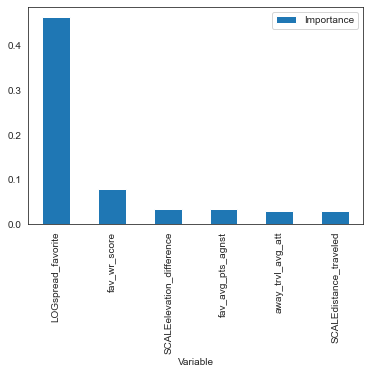

In [67]:
varimp_perm15.plot.bar(x = "Variable", y = "Importance")

In [ ]:
#Model interpretation explained in the Keras Summary